In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import KFold

In [2]:
from create_matrix import *

from tensor_custom_core import *
from create_matrix import *
from tensor_custom_core import *
from degree_days import dds
appliance_index = {appliance: APPLIANCES_ORDER.index(appliance) for appliance in APPLIANCES_ORDER}

APPLIANCES = ['fridge', 'hvac', 'wm', 'mw', 'oven', 'dw']
region = "SanDiego"
year = 2014

import os
from degree_days import dds



def un_normalize(x, maximum, minimum):
    return (maximum - minimum) * x + minimum

In [3]:
def get_tensor(df, dfc):
    start, stop = 1, 13
    energy_cols = np.array(
        [['%s_%d' % (appliance, month) for month in range(start, stop)] for appliance in APPLIANCES_ORDER]).flatten()

    static_cols = ['area', 'total_occupants', 'num_rooms']
    static_df = df[static_cols]
    static_df = static_df.div(static_df.max())
    weather_values = np.array(dds[2014][region][start - 1:stop - 1]).reshape(-1, 1)

    dfc = df.copy()

    df = dfc[energy_cols]
    col_max = df.max().max()
    col_min = df.min().min()
    # df = (1.0 * (df - col_min)) / (col_max - col_min)
    tensor = df.values.reshape((len(df), 7, stop - start))
    M, N, O = tensor.shape
    return tensor

In [4]:
sd_df, sd_dfc = create_matrix_single_region("SanDiego", year)
sd_tensor = get_tensor(sd_df, sd_dfc)
au_df, au_dfc = create_matrix_single_region('Austin', year)
au_tensor = get_tensor(au_df, au_dfc)
sd_tensor_copy = sd_tensor.copy()
au_tensor_copy = au_tensor.copy()

In [125]:
sd_sum = pd.Series(sd_df.sum(axis = 0))
sd_sum[72:]

oven_1                80.420317
oven_2                68.087418
oven_3               149.331448
oven_4               164.836065
oven_5               130.959264
oven_6               126.376584
oven_7               139.008530
oven_8               180.984369
oven_9               166.228336
oven_10              121.764713
oven_11              184.324100
oven_12              217.845264
aggregate_1         4545.529831
aggregate_2         4022.067444
aggregate_3         7318.223763
aggregate_4         8381.213081
aggregate_5        11474.293266
aggregate_6        12230.870567
aggregate_7        16703.328674
aggregate_8        18809.148376
aggregate_9        19197.846695
aggregate_10       10816.803650
aggregate_11        7820.477615
aggregate_12        8538.634384
dw_1                  81.713447
dw_2                  76.330301
dw_3                  91.474200
dw_4                 157.724983
dw_5                  80.844767
dw_6                 201.225234
dw_7                 166.704750
dw_8    

In [ ]:
pd.DataFrame(sd_sum[:72].reshape(12, 6), columns = np.arange(6))

In [ ]:
for appliance in APPLIANCES_ORDER:
    

In [6]:
a=3
case=2
cost='abs'
H_au, A_au, T_au = learn_HAT(case, au_tensor_copy, a, a, num_iter=8000, lr=0.1, dis=False, cost_function=cost, T_known = np.ones(12).reshape(-1, 1))

In [55]:
T_au = [int(x*10) for x in dds[2014]['Austin']]
T_sd = [int(x*10) for x in dds[2014]['SanDiego']]

In [56]:
T_sd = np.c_[T_sd, np.ones(12).reshape(-1, 1)]
T_au = np.c_[T_au, np.ones(12).reshape(-1, 1)]

In [73]:
case = 2
a = 3
b = 5
iter_adapt = 4000
n_splits = 10

In [58]:
H_au_weather, A_au_weather, T_au_weather = learn_HAT(case, au_tensor_copy, a, b, num_iter=8000, lr=0.1, dis=False, cost_function=cost, T_known = T_au)

In [74]:
H_au, A_au, T_au = learn_HAT(case, au_tensor_copy, a, b, num_iter=8000, lr=0.1, dis=False, cost_function=cost, T_known = np.ones(12).reshape(-1,1))

In [75]:
T_au_weather

array([[  0.        ,   1.        ,   0.        ,  14.14950766],
       [  0.        ,   1.        ,   0.        ,  12.06482742],
       [  0.        ,   1.        ,   1.09305461,  10.78689815],
       [  3.        ,   1.        ,   0.        ,   8.22630776],
       [  5.        ,   1.        ,   0.        ,   8.18001359],
       [  8.        ,   1.        ,   6.07473088,   4.24141262],
       [  9.        ,   1.        ,  10.8544103 ,   1.61763898],
       [ 10.        ,   1.        ,  14.34953269,   0.        ],
       [  7.        ,   1.        ,   7.68547018,   3.71282546],
       [  4.        ,   1.        ,   5.15743876,   6.05877841],
       [  0.        ,   1.        ,   0.83722228,  11.12188385],
       [  0.        ,   1.        ,   0.791619  ,  12.63012853]])

In [76]:
T_au

array([[  1.00000000e+00,   0.00000000e+00,   3.48324353e+00,
          1.59926769e+01,   0.00000000e+00],
       [  1.00000000e+00,   3.65571797e-02,   3.49390205e+00,
          1.27594181e+01,   1.80310532e-01],
       [  1.00000000e+00,   1.35730709e-02,   6.27252438e+00,
          8.31022885e+00,   6.05292542e-01],
       [  1.00000000e+00,   3.79198792e-01,   7.92128326e+00,
          2.61780128e+00,   4.78797872e+00],
       [  1.00000000e+00,   2.34614886e+00,   8.41151455e+00,
          1.20674520e+00,   7.73334430e+00],
       [  1.00000000e+00,   1.18501736e+01,   6.05154831e+00,
          1.19264846e+00,   9.63604861e+00],
       [  1.00000000e+00,   1.42136186e+01,   5.18390792e+00,
          0.00000000e+00,   1.35637279e+01],
       [  1.00000000e+00,   1.82294007e+01,   3.02396934e+00,
          1.53159637e+00,   1.48948513e+01],
       [  1.00000000e+00,   9.29720481e+00,   5.41229313e+00,
          1.16438060e+00,   1.17633467e+01],
       [  1.00000000e+00,   4.2359136

In [77]:
from sklearn.model_selection import train_test_split, KFold
from common import compute_rmse
from common import compute_rmse_fraction


In [78]:
pred = {}
for random_seed in range(5):
    pred[random_seed] = {}
    for appliance in APPLIANCES_ORDER:
        pred[random_seed][appliance] = {f:[] for f in range(10, 110, 10)}

kf = KFold(n_splits=n_splits)

for random_seed in range(3):
    print ("random_seed:", random_seed)
    for train_percentage in range(10, 110, 10):
        print ("train_percentage:", train_percentage)
        rd = 0
        for train_max, test in kf.split(sd_df):
            print ("rd:", rd)
            rd += 1

            num_train = int((train_percentage*len(train_max)/100)+0.5)
            if train_percentage==100:
                train = train_max
            else:
                train, _ = train_test_split(train_max, train_size = train_percentage/100.0, random_state=random_seed)
            train_ix = sd_df.index[train]
            test_ix = sd_df.index[test]

            num_test = len(test_ix)
            train_test_ix = np.concatenate([test_ix, train_ix])
            df_t, dfc_t = sd_df.ix[train_test_ix], sd_dfc.ix[train_test_ix]
            tensor = get_tensor(df_t, dfc_t)
            tensor_copy = tensor.copy()
            # First n
            tensor_copy[:num_test, 1:, :] = np.NaN

            H, A, T = learn_HAT(case, tensor_copy, a, b, num_iter=iter_adapt, lr=0.1, dis=False, cost_function=cost, A_known=A_au, T_known=T_sd)

            HAT = multiply_case(H, A, T, case)
            for appliance in APPLIANCES_ORDER:
                pred[random_seed][appliance][train_percentage].append(pd.DataFrame(HAT[:num_test, appliance_index[appliance], :], index=test_ix))

('random_seed:', 0)
('train_percentage:', 10)
('rd:', 0)
('rd:', 1)
('rd:', 2)
('rd:', 3)
('rd:', 4)
('rd:', 5)
('rd:', 6)
('rd:', 7)
('rd:', 8)
('rd:', 9)
('train_percentage:', 20)
('rd:', 0)
('rd:', 1)
('rd:', 2)
('rd:', 3)
('rd:', 4)
('rd:', 5)
('rd:', 6)
('rd:', 7)
('rd:', 8)
('rd:', 9)
('train_percentage:', 30)
('rd:', 0)
('rd:', 1)
('rd:', 2)
('rd:', 3)
('rd:', 4)
('rd:', 5)
('rd:', 6)
('rd:', 7)
('rd:', 8)
('rd:', 9)
('train_percentage:', 40)
('rd:', 0)
('rd:', 1)
('rd:', 2)
('rd:', 3)
('rd:', 4)
('rd:', 5)
('rd:', 6)
('rd:', 7)
('rd:', 8)
('rd:', 9)
('train_percentage:', 50)
('rd:', 0)
('rd:', 1)
('rd:', 2)
('rd:', 3)
('rd:', 4)
('rd:', 5)
('rd:', 6)
('rd:', 7)
('rd:', 8)
('rd:', 9)
('train_percentage:', 60)
('rd:', 0)
('rd:', 1)
('rd:', 2)
('rd:', 3)
('rd:', 4)
('rd:', 5)
('rd:', 6)
('rd:', 7)
('rd:', 8)
('rd:', 9)
('train_percentage:', 70)
('rd:', 0)
('rd:', 1)
('rd:', 2)
('rd:', 3)
('rd:', 4)
('rd:', 5)
('rd:', 6)
('rd:', 7)
('rd:', 8)
('rd:', 9)
('train_percentage:', 80)
('

In [79]:
out = {}
for random_seed in range(3):
    out[random_seed] = {}   
    for appliance in APPLIANCES_ORDER[1:]:
        out[random_seed][appliance] = {}
        for f in range(10,110,10):
            s = pd.concat(pred[random_seed][appliance][f]).ix[sd_df.index]
            if appliance=="hvac":
                out[random_seed][appliance][f] = compute_rmse_fraction(appliance,s[range(4, 10)],'SanDiego')[2]
            else:   
                out[random_seed][appliance][f] = compute_rmse_fraction(appliance, s,'SanDiego')[2]

/home/yj9xs/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


In [80]:
mean_out = pd.Panel(out).mean(axis=0)

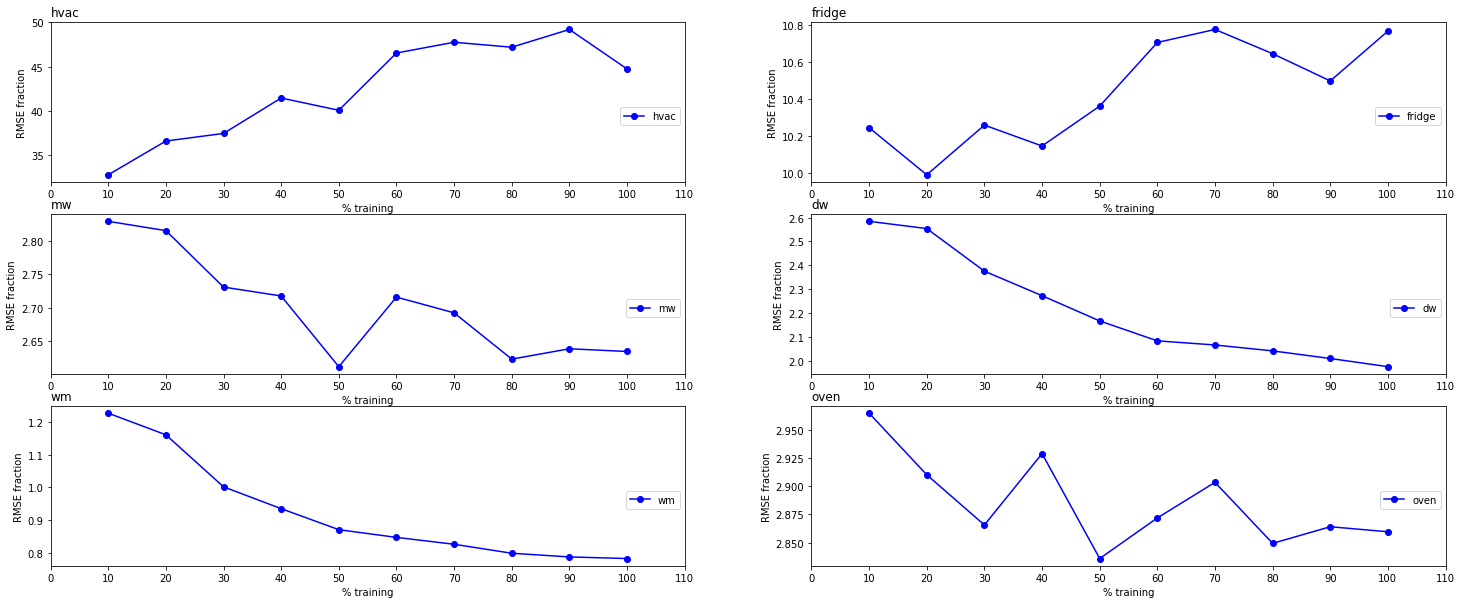

In [81]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(50, 80))
ax = axes.flatten()
count = 0

for appliance in APPLIANCES_ORDER[1:]:
#     print appliance
    df = mean_out[appliance]
    pd.DataFrame(df).plot(ax=ax[count],figsize=(25, 10), marker='o', xlim=(0, 110), color=['b', 'g','r', 'y', 'k', 'c'])
    ax[count].legend(loc='best', bbox_to_anchor=(1.0, 0.5))


#     major_ticks = np.arange(0, 101, 20)   

    ax[count].set_xlabel("% training");
    ax[count].locator_params(tight=False, nbins=20, axis='x')
    ax[count].set_ylabel('RMSE fraction')
    ax[count].set_title(appliance, loc="left")
    count += 1
# plt.savefig("./analysis/0711/prediction_normal_transfer", bbox_inches="tight", dpi=300)